# Imports

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential

import numpy as np
import PIL
import PIL.Image

# Data Loading

In [11]:
#https://keras.io/api/data_loading/

train_ds = keras.utils.image_dataset_from_directory(
    directory='coin_dataset/coins_images/currency_recognition',
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset="training",
    seed=123,
    batch_size=32,
    image_size=(128, 128))

val_ds = keras.utils.image_dataset_from_directory(
    directory='coin_dataset/coins_images/currency_recognition',
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset="validation",
    seed=123,
    batch_size=32,
    image_size=(128, 128))


Found 1229 files belonging to 6 classes.
Using 984 files for training.
Found 1229 files belonging to 6 classes.
Using 245 files for validation.


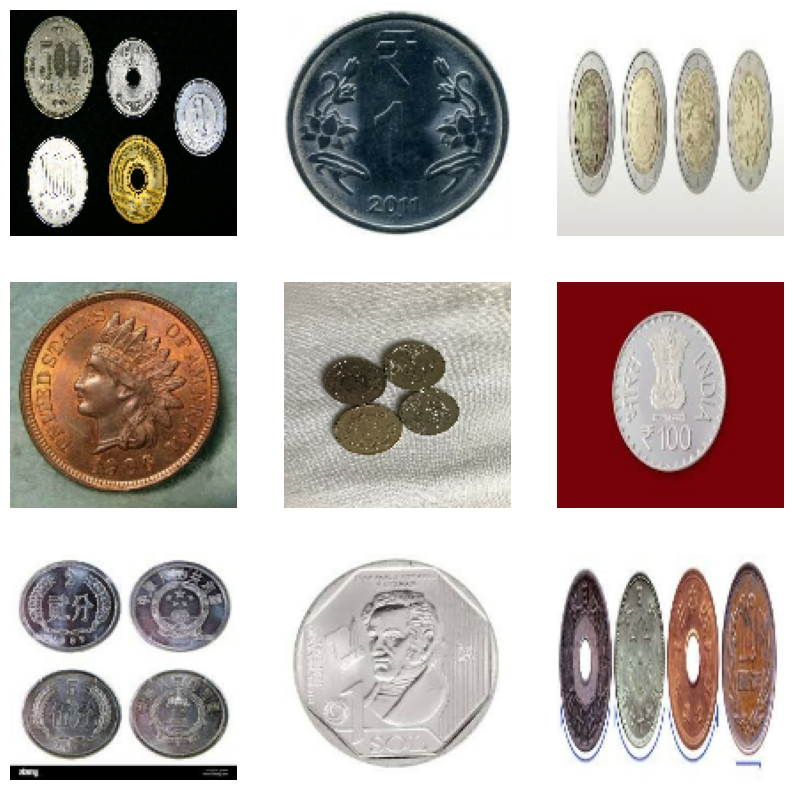

In [12]:
#https://www.tensorflow.org/tutorials/load_data/images

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")


# Model

In [14]:
#https://www.tensorflow.org/tutorials/images/classification#train_the_model

model = Sequential([
  layers.Rescaling(1./255, input_shape=(128, 128, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(6)
])

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)       

In [17]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
31/31 [==============================] - 9s 259ms/step - loss: 7.8895 - accuracy: 0.1382 - val_loss: 5.5920 - val_accuracy: 0.1510
Epoch 2/10
31/31 [==============================] - 8s 246ms/step - loss: 10.5652 - accuracy: 0.1829 - val_loss: 10.5261 - val_accuracy: 0.1878
Epoch 3/10
31/31 [==============================] - 8s 251ms/step - loss: 10.8928 - accuracy: 0.1870 - val_loss: 10.5261 - val_accuracy: 0.1918
Epoch 4/10
31/31 [==============================] - 8s 257ms/step - loss: 10.8928 - accuracy: 0.1870 - val_loss: 10.5261 - val_accuracy: 0.1918
Epoch 5/10
31/31 [==============================] - 8s 236ms/step - loss: 10.8928 - accuracy: 0.1870 - val_loss: 10.5261 - val_accuracy: 0.1918
Epoch 6/10
31/31 [==============================] - 7s 224ms/step - loss: 10.8928 - accuracy: 0.1870 - val_loss: 10.5261 - val_accuracy: 0.1918
Epoch 7/10
31/31 [==============================] - 7s 227ms/step - loss: 10.8928 - accuracy: 0.1870 - val_loss: 10.5261 - val_accuracy: 0

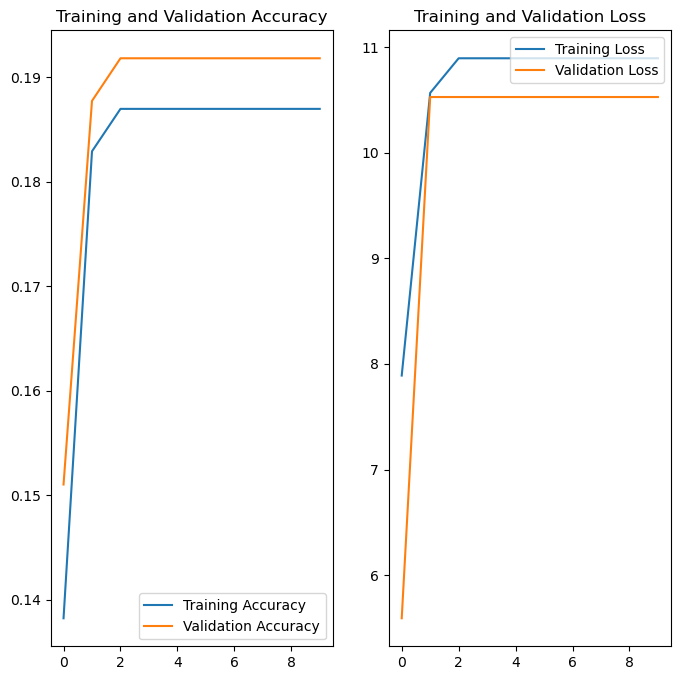

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()